In [4]:
# Example of LSTM to learn a sequence
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from sklearn.metrics import(
    classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
)
from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder
)
# from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.pipeline import Pipeline, FeatureUnion

In [5]:
data= pd.read_csv('D:\\Desktop Files\\weka data\\Ms Imumu\\hh130\\hh130.ann.features.csv')

In [27]:
data.head()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,2.0,7371.0,3.0,5722.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,2.0,7373.0,3.0,5723.0,2.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,2.0,7374.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,2.0,7375.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
4,2.0,7378.0,3.0,5416.0,3.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157372 entries, 0 to 157371
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lastSensorEventHours      157372 non-null  float64
 1   lastSensorEventSeconds    157372 non-null  float64
 2   lastSensorDayOfWeek       157372 non-null  float64
 3   windowDuration            157372 non-null  float64
 4   timeSinceLastSensorEvent  157372 non-null  float64
 5   prevDominantSensor1       157372 non-null  float64
 6   prevDominantSensor2       157372 non-null  float64
 7   lastSensorID              157372 non-null  float64
 8   lastSensorLocation        157372 non-null  float64
 9   lastMotionLocation        157372 non-null  float64
 10  complexity                157372 non-null  float64
 11  activityChange            157372 non-null  float64
 12  areaTransitions           157372 non-null  float64
 13  numDistinctSensors        157372 non-null  f

In [10]:
# data['activity'].value_counts
pd.unique(data['activity']).shape

(28,)

In [63]:
# df.iloc[lambda x: x.index % 2 == 0]
X = data.iloc[:, 0:36]
y = data.iloc[:,36]

In [86]:
def make_pair_plot(df_corr):
    # Set the default matplotlib figure size to 7x7:
    fix, ax = plt.subplots(figsize=(20,15))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True, cmap="BrBG")

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    legend_prop = {'weight':'bold','size':10}
    plt.legend(prop=legend_prop)
    plt.show()

<ipython-input-86-b9ef8435d522>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)
No handles with labels found to put in legend.


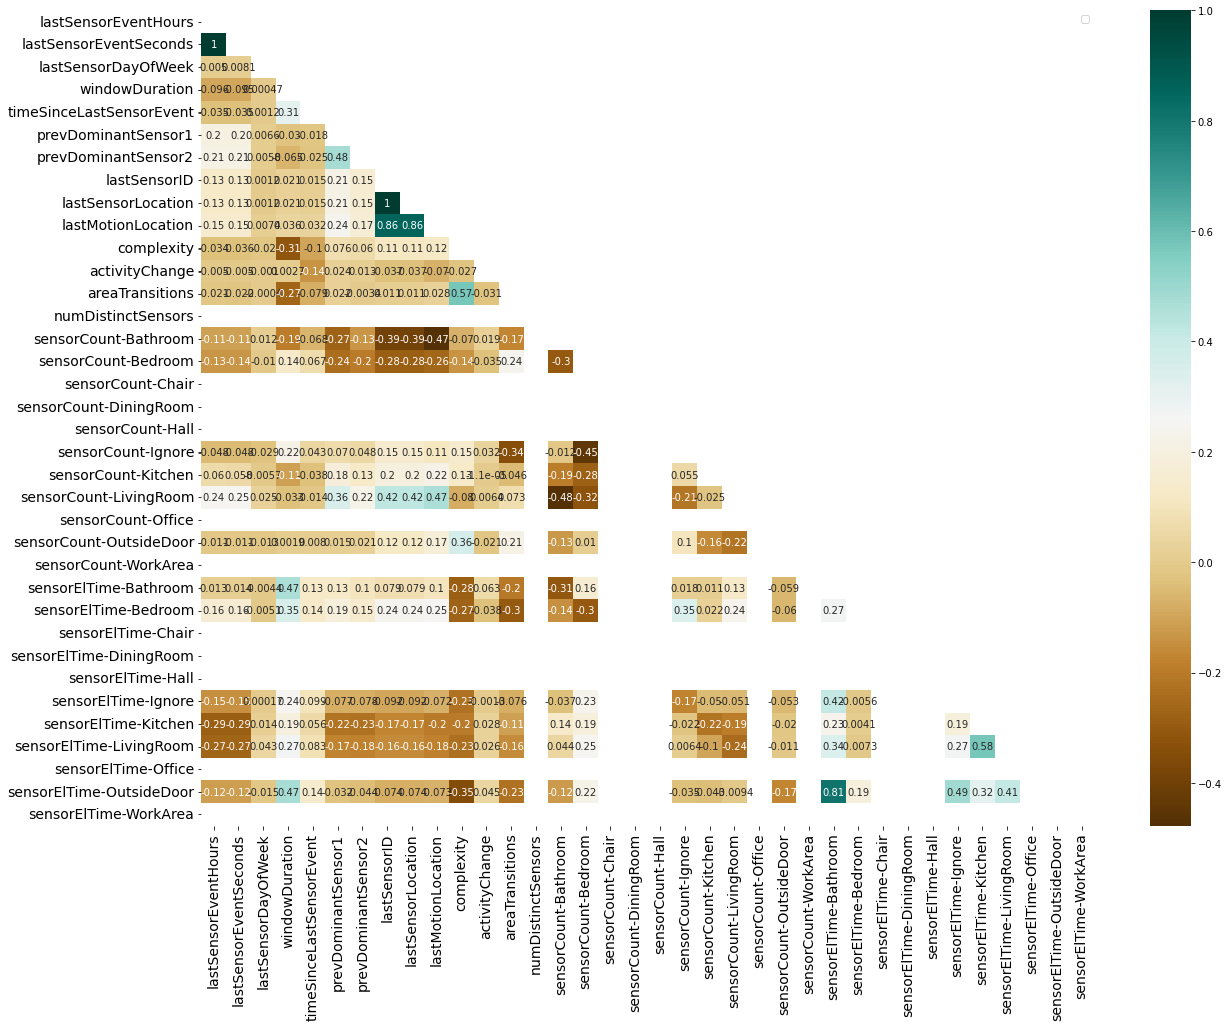

In [87]:
make_pair_plot(data.corr())

In [18]:
# convert dataframe to numpy array
values = data.values
X, y = values[:, 0:36], values[:,36]
# X = X.reshape(len(X), 36, 1)

X = np.asarray(X).astype(np.float64)
# X = data.iloc[:, 0:36]
# y = data.iloc[:,36]


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# To reverse the integers to strings
# inverse_transform()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [21]:
X.shape,y.shape

((157372, 36), (157372,))

In [18]:
# create sequence
# length = 10
# sequence = [i/float(length) for i in range(length)]
# print(sequence)
# # create X/y pairs
# df = DataFrame(sequence)
# df = concat([df.shift(1), df], axis=1)
# df.dropna(inplace=True)
# convert to LSTM friendly format
values = df.values
Xm, ym = values[:, 0], values[:, 1]
Xm = Xm.reshape(len(Xm), 1, 1)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [95]:
# 1. define network
model = Sequential()
model.add(LSTM(35))
model.add(Dense(1))
# 2. compile network
model.compile(optimizer='adam', loss='mean_squared_error')
# 3. fit network
history = model.fit(X_train, y_train, epochs=10, batch_size=50000, verbose=0)
# 4. evaluate network
loss = model.evaluate(X_train, y_train, verbose=0)
print(loss)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# 5. make predictions
predictions = model.predict(X, verbose=0)
print(predictions[:, 0])

In [17]:
X.shape,X_train.shape

((150, 4), (125897, 36, 1))

In [22]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
dataframe = pandas.read_csv("D:\\Desktop Files\\weka data\\Ms Imumu\\iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(36, input_dim=36, activation='relu'))
#     model.add(Dense(, activation='softmax'))
#     model.add(Dense(, activation='softmax'))
    model.add(Dense(28, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: 

In [ ]:
import category_encoders as ce
import pandas as pd
train_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'phd':5}}])

#Original data
train_df

#fit and transform train data 
df_train_transformed = encoder.fit_transform(train_df)

In [ ]:
sorted_x = sorted(set(x))
ordinal_encoding = x.replace(dict(zip(sorted_x, range(1, len(sorted_x) + 1))))

In [2]:
!pip install jupyterthemes

In [3]:
import jupyterthemes as jt
!jt -t monokai
# !jt -r
# Available themes:
# onedork grade3 oceans16 chesterish monokai solarizedl solarizedd